# <b> Yukie Kuang Capstone: Colon Tissue Image Classification 

## Table of Contents
[Sprint 1](#capstone-sprint-1)
- [Dataset](#dataset)<br>
- [Setup Enviornment](#setup-enviornment)<br>
- [Preliminary EDA](#exploratory-data-analysis)
<br>

[Sprint 2](#sprint-2)
- [Overview]()


## Sprint 1:


## Overview 

Utilizing the MHIST dataset, as referenced in a recent publication and another available on GitHub taken from the hospital in Chaoyang, Beijing, this project's primary objective is to develop a machine learning model that can accurately identify malignancies in various colon tissue biopsies. This effort is particularly significant for researchers specializing in gastrointestinal anatomy, as it provides valuable insights with the potential to drive further research and contribute to the development of new treatments for colon-related diseases.

The initial phase of this project involves conducting basic exploratory analysis and visualization of the two datasets. Our approach, centered around the use of advanced methodologies like convolutional neural networks, aims to achieve two key goals: firstly, to significantly improve the accuracy of classifying diseased colon tissue, and secondly, to enhance our comprehension of the unique challenges and possibilities inherent in applying AI to medical image analysis. This dual focus aligns with the broader goal of harnessing AI's power to revolutionize diagnostic processes in the field of pathology. 

## Dataset

<br>The datasets comes with labeled .csv files that lables the images.

<br>[MHIST](https://bmirds.github.io/MHIST/)
<br>_Contains:_
- Test 977 images
- Train 2,175 
<br>* dataset is not split 
- 

<br>[Chaoyang](https://github.com/bupt-ai-cz/HSA-NRL/?tab=readme-ov-file)
<br>_Contains:_
- Test 2,139 images 
- Train 4,021 images
<br>* were already pre-split into seperate folders upon download
- 

## Setup Enviornment


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tifffile
import tensorflow as tf
import os
from PIL import Image
import cv2
import json


/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
2024-03-11 17:56:45.358847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exploratory Data Analysis

First we will extract some information from the csv files in the Chaoyang and MHIST dataset.

In [4]:
mhist_csv = pd.read_csv('/Users/yukiekuang/Downloads/annotations.csv')


In [5]:
mhist_csv.head()


Image Name Majority Vote Label  \
0  MHIST_aag.png                  HP   
1  MHIST_aah.png                  HP   
2  MHIST_aar.png                  HP   
3  MHIST_aay.png                  HP   
4  MHIST_abs.png                  HP   

   Number of Annotators who Selected SSA (Out of 7) Partition  Unnamed: 4  \
0                                                 2      test         NaN   
1                                                 2      test         NaN   
2                                                 0      test         NaN   
3                                                 1      test         NaN   
4                                                 2      test         NaN   

   Unnamed: 5 Unnamed: 6  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN

In [6]:
mhist_csv['Partition'].value_counts()

Partition
test    977
Name: count, dtype: int64

In [7]:
mhist_csv_df = mhist_csv['Majority Vote Label'].value_counts()

In [8]:
mhist_csv_df

Majority Vote Label
HP     617
SSA    360
Name: count, dtype: int64

In [9]:
mhist_csv.describe()

Number of Annotators who Selected SSA (Out of 7)  Unnamed: 4  \
count                                        977.000000         0.0   
mean                                           2.925281         NaN   
std                                            2.478090         NaN   
min                                            0.000000         NaN   
25%                                            1.000000         NaN   
50%                                            2.000000         NaN   
75%                                            5.000000         NaN   
max                                            7.000000         NaN   

       Unnamed: 5  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

The MHIST dataset seems to be based on a scoring of annotators.

In [10]:
cy_df_train = pd.read_json('/Users/yukiekuang/Downloads/train.json')

In [11]:
cy_df_train.head()

label                             name
0      1  train/353042_4-IMG005x014-1.JPG
1      1  train/353042_4-IMG005x015-1.JPG
2      1  train/353042_4-IMG006x010-1.JPG
3      1  train/353042_4-IMG007x011-1.JPG
4      1  train/353042_4-IMG007x015-1.JPG

In [12]:
cy_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4021 non-null   int64 
 1   name    4021 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.0+ KB


In [13]:
cy_df_train_df = cy_df_train['label'].value_counts()

In [14]:
cy_df_train_df

label
2    1404
0    1111
1     842
3     664
Name: count, dtype: int64

In [15]:
cy_df_test = pd.read_json('/Users/yukiekuang/Downloads/test.json')

In [16]:
cy_df_test.head()

label                          name
0      2  test/535940-IMG009x022-2.JPG
1      2  test/535940-IMG009x023-2.JPG
2      2  test/535940-IMG009x026-2.JPG
3      2  test/535940-IMG010x011-2.JPG
4      2  test/535940-IMG010x012-2.JPG

In [17]:
cy_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2139 non-null   int64 
 1   name    2139 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.5+ KB


In [18]:
cy_df_test_df = cy_df_test['label'].value_counts()
cy_df_test_df

label
2    840
0    705
1    321
3    273
Name: count, dtype: int64

-----------

In [19]:
import json

try:
    with open('/Users/yukiekuang/Downloads/train.json', 'r') as file:
        data = json.load(file)

    # Set the maximum number of iterations
    max_iterations = 5
    iteration_count = 0

    # Assuming data is a list of dictionaries
    for item in data:
        print(item)  # This prints each dictionary in the list

        # Increment the iteration count
        iteration_count += 1

        # Break out of the loop if the maximum number of iterations is reached
        if iteration_count == max_iterations:
            break

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 1, 'name': 'train/353042_4-IMG005x014-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG005x015-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG006x010-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x011-1.JPG'}
{'label': 1, 'name': 'train/353042_4-IMG007x015-1.JPG'}


In [20]:
import json

try:
    with open('/Users/yukiekuang/Downloads/test.json', 'r') as file:
        data = json.load(file)

    # Set the maximum number of iterations
    max_iterations = 5
    iteration_count = 0

    # Assuming data is a list of dictionaries
    for item in data:
        print(item)  # This prints each dictionary in the list

        # Increment the iteration count
        iteration_count += 1

        # Break out of the loop if the maximum number of iterations is reached
        if iteration_count == max_iterations:
            break

except FileNotFoundError:
    print("The file was not found.")
except json.JSONDecodeError:
    print("Error decoding JSON.")

{'label': 2, 'name': 'test/535940-IMG009x022-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x023-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG009x026-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x011-2.JPG'}
{'label': 2, 'name': 'test/535940-IMG010x012-2.JPG'}


Write loop that loops through image files in folders utilizing the OS module

In [21]:
directory1 = '/Users/yukiekuang/Downloads/train'
# directory1 contains the train Chaoyang dataset
# Prepare an empty list to store the image data
image_data1 = []

for filename in os.listdir(directory1):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory1, filename)
        
        with Image.open(file_path) as img:
            #Append a tuple of file properties to the list
            image_data1.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df1 = pd.DataFrame(image_data1, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df1).head()

                       Filename        Size Mode Format
0       537699-IMG010x009-0.JPG  (512, 512)  RGB   JPEG
1     540293_1-IMG016x031-2.JPG  (512, 512)  RGB   JPEG
2       535953-IMG013x006-0.JPG  (512, 512)  RGB   JPEG
3       542441-IMG024x009-2.JPG  (512, 512)  RGB   JPEG
4     543358_2-IMG012x007-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
4016    538850-IMG006x037-0.JPG  (512, 512)  RGB   JPEG
4017    538377-IMG025x012-0.JPG  (512, 512)  RGB   JPEG
4018  543645_1-IMG013x019-2.JPG  (512, 512)  RGB   JPEG
4019  535997_1-IMG013x011-0.JPG  (512, 512)  RGB   JPEG
4020  539085_2-IMG017x013-2.JPG  (512, 512)  RGB   JPEG

[4021 rows x 4 columns]


In [22]:
directory2 = '/Users/yukiekuang/Downloads/test'
# directory2 contains the test Chaoyang dataset
# Prepare an empty list to store the image data
image_data2 = []

for filename in os.listdir(directory2):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory2, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data2.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df2 = pd.DataFrame(image_data2, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df2).head()

                       Filename        Size Mode Format
0     538880-3-IMG011x046-1.JPG  (512, 512)  RGB   JPEG
1     537690_1-IMG013x010-0.JPG  (512, 512)  RGB   JPEG
2     537688_2-IMG008x009-0.JPG  (512, 512)  RGB   JPEG
3     543086_1-IMG010x012-2.JPG  (512, 512)  RGB   JPEG
4       538898-IMG011x008-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
2134    541831-IMG035x022-2.JPG  (512, 512)  RGB   JPEG
2135  543086_1-IMG008x022-2.JPG  (512, 512)  RGB   JPEG
2136  538842_1-IMG006x004-0.JPG  (512, 512)  RGB   JPEG
2137  543086_1-IMG024x020-2.JPG  (512, 512)  RGB   JPEG
2138  538880-3-IMG024x051-3.JPG  (512, 512)  RGB   JPEG

[2139 rows x 4 columns]


In [23]:
directory3 = '/Users/yukiekuang/Downloads/images'
# directory3 contains the MHIST dataset
# Prepare an empty list to store the image data
image_data3 = []

for filename in os.listdir(directory3):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory3, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data3.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df3 = pd.DataFrame(image_data3, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df3)

           Filename        Size Mode Format
0     MHIST_djh.png  (224, 224)  RGB    PNG
1     MHIST_dis.png  (224, 224)  RGB    PNG
2     MHIST_atj.png  (224, 224)  RGB    PNG
3     MHIST_cou.png  (224, 224)  RGB    PNG
4     MHIST_awq.png  (224, 224)  RGB    PNG
...             ...         ...  ...    ...
3147  MHIST_avx.png  (224, 224)  RGB    PNG
3148  MHIST_cmg.png  (224, 224)  RGB    PNG
3149  MHIST_auc.png  (224, 224)  RGB    PNG
3150  MHIST_dhz.png  (224, 224)  RGB    PNG
3151  MHIST_dka.png  (224, 224)  RGB    PNG

[3152 rows x 4 columns]


Show a small sample of images from each dataset.

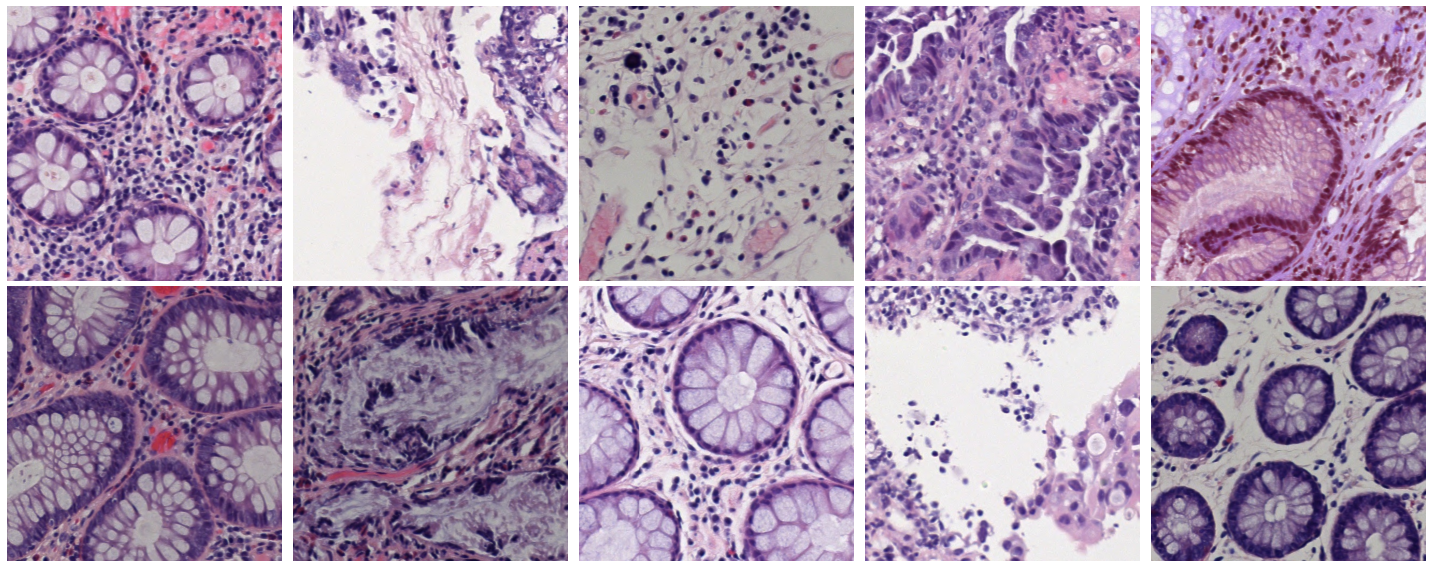

In [24]:
'''
create a function that passes in 3 parameters: image_path, position, and grid_size
when called, the function will create a subplot and place each positions 
'''

def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # defines each individual subplot within grid. 
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Set the number of images to display
num_images_to_show = 10

# Set Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df1))):
    file_path = os.path.join(directory1, df1.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

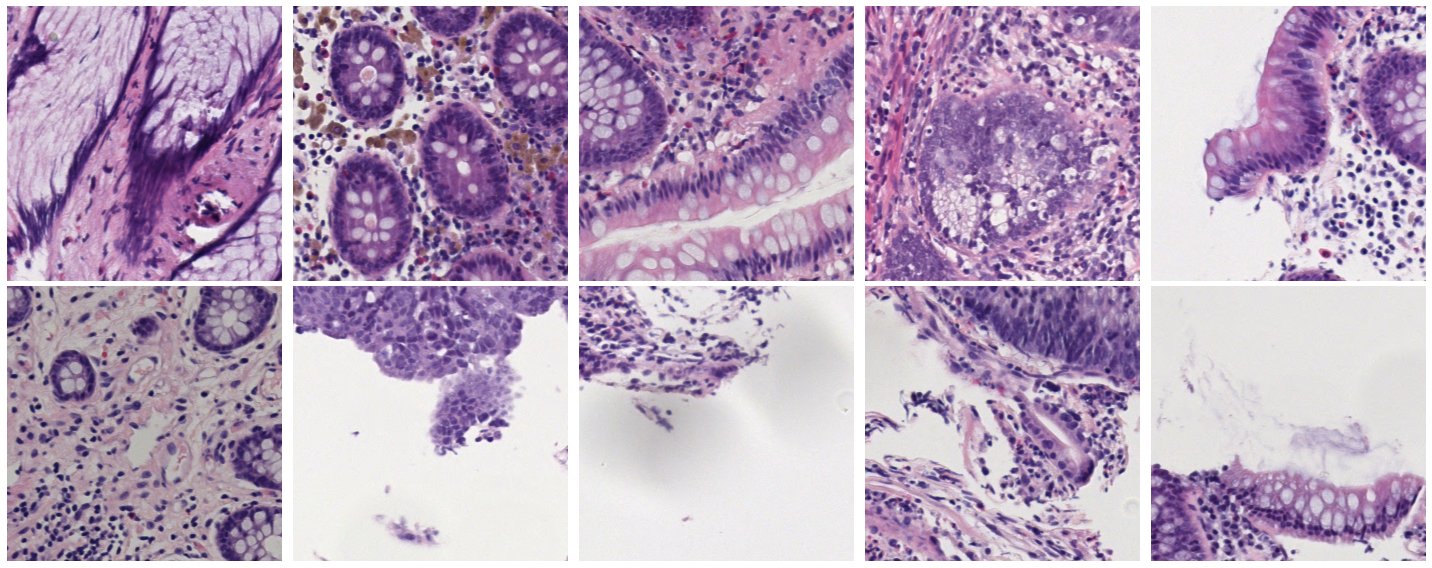

In [25]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df2))):
    file_path = os.path.join(directory2, df2.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

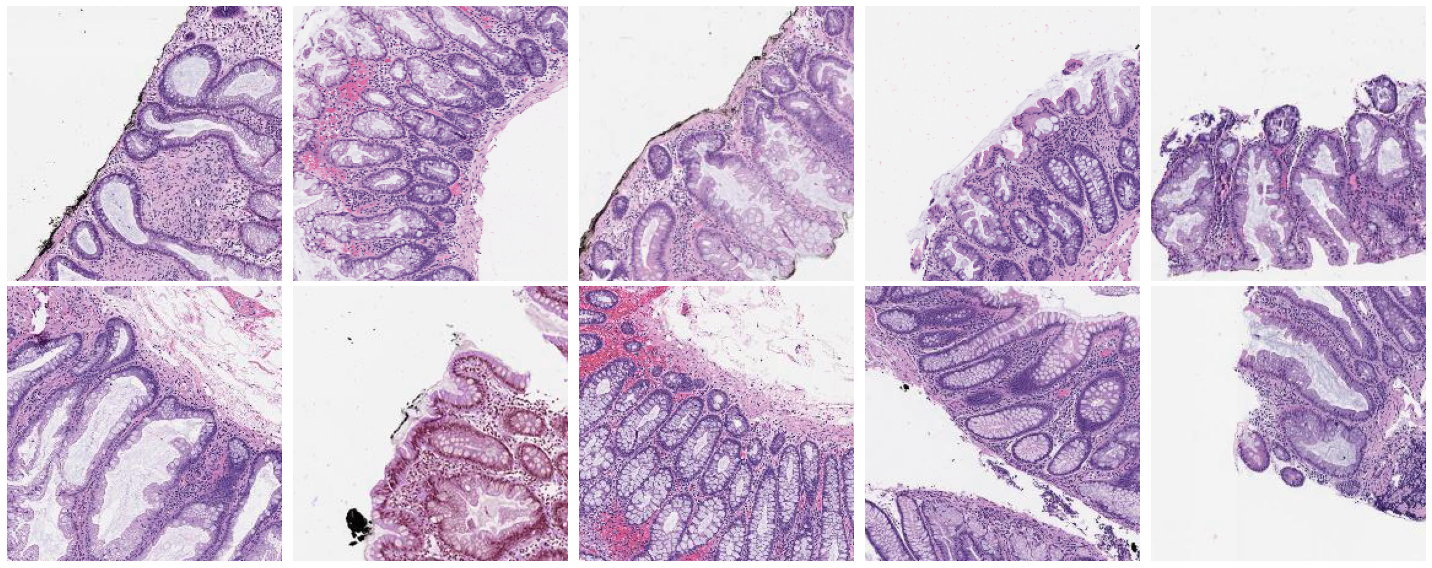

In [26]:
def display_image_in_grid(image_path, position, grid_size):
    plt.subplot(*grid_size, position)  # Create a subplot in the specified grid position
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

# Number of images to display
num_images_to_show = 10

# Grid size (rows, columns)
grid_size = (2, 5)

plt.figure(figsize=(20, 8))  # Set the figure size (width, height)

# Loop through the first few images and display them in the grid
for i in range(min(num_images_to_show, len(df3))):
    file_path = os.path.join(directory3, df3.iloc[i]['Filename'])
    display_image_in_grid(file_path, i+1, grid_size)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

----------------

# Sprint 2


### Overview
From sprint 1, preliminary EDA was done to look at the 2 datasets from different sources. Although, the sizing between the two are different:
- MHIST dataset is 224 x 224
- Chaoyang dataset is 512 x 512
<br> We can fix this by scaling the images by resizing or cropping the MHIST dataset. 

<br> Another finding is that the labels in:
- Chaoyang dataset has 4 labels "0" means normal, "1" means serrated, "2" means adenocarinoma, and "3" means adenoma 
- MHIST dataset has 2 lables HP (Hyperplastic Polyp) aka normal polyps have no potential to become malignant or SSA (Sessile Serated Adenoma)

So far: 
| <u>DataFrame        | <u>Label | <u>Count |
|------------------|-------|-------|
| <b>mhist_csv_df     | HP    | 617   |
|                  | SSA   | 360   |
| <b>cy_df_train_df   | 2     | 1404  |
|                  | 0     | 1111  |
|                  | 1     | 842   |
|                  | 3     | 664   |
| <b>cy_df_test_df    | 2     | 840   |
|                  | 0     | 705   |
|                  | 1     | 321   |
|                  | 3     | 273   |

Although the MHIST website's Dataset Description shows 3,152 images are in the zip file only 977 were labeled. [MHIST dataset]()

We're merging the MHIST and Chaoyang datasets to improve the detection of sessile serrated adenomas, which are often missed in diagnoses. By prioritizing sensitivity, our model leans towards over-detection, prompting further tests when SSA is suspected. 

In the following pre-processing/EDA steps I will:
1. combine images with labels
    - combine chaoyang test and train images with corresponding labels
    - set hp and ssa to the chaoyang labels hp = 0 and ssa = 1 via mapping
    - drop unecessary columns and rename columns to match chaoyang dataset
2. resize the choayang dataset to match mhist's
3. split the mhist dataset into test and split
4. merge that to the pre-split test and train chaoyang dataset 
5. run the Chaoyang dataset through:
- pixel value scaling
- noise detetion
- data augmentation 
- edge detection


### 1. Combine images with labels with the image datasets

In [27]:
#set file paths and load json files for the chaoyang dataset
# json labels separate file names and labels

cy_train_lables_path = '/Users/yukiekuang/Downloads/train.json'
cy_test_lables_path = '/Users/yukiekuang/Downloads/test.json'

with open(cy_train_lables_path) as f:
    cy_train_labels = json.load(f)

with open(cy_test_lables_path) as f:
    cy_test_labels = json.load(f)


In [28]:
# use pytorch customimagedataset

from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms

In [29]:
# Define any transformations (here just an example)
resize_transform = transforms.Compose([
    transforms.Resize((224, 224))
])

In [30]:
#create custom dataset class to add lables with corresponding images

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, json_labels, transform=None):
        """
        root_dir: Root directory path where images are stored.
        json_labels: A list of dictionaries, where each dictionary contains 'name' and 'label'.
        transform: Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.json_labels = json_labels
        self.transform = resize_transform
        

    def __len__(self):
        return len(self.json_labels)

    def __getitem__(self, idx):
        # Fetching the 'name' directly as it includes both subdir and filename
        img_path = os.path.join(self.root_dir, self.json_labels[idx]['name'])
        image = Image.open(img_path).convert('RGB')  # Ensuring the image is in RGB format
        label = self.json_labels[idx]['label']
        if self.transform:
            image = self.transform(image)
        return image, label

In [31]:
import torch
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
cy_train_dataset = CustomImageDataset(root_dir='/Users/yukiekuang/Downloads', json_labels=cy_train_labels)
cy_test_dataset = CustomImageDataset(root_dir='/Users/yukiekuang/Downloads', json_labels=cy_test_labels)

In [33]:
print(f"Train dataset length: {len(cy_train_dataset)}")
print(f"Test dataset length: {len(cy_test_dataset)}")

Train dataset length: 4021
Test dataset length: 2139


In [63]:
''' 
create function to show 5 side-by-side subplots on dataset that runs through a tuple: {image,label}
'''

def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i, ax in enumerate(axes.flat):
        # fetch the i-th image from the dataset
        image, label = dataset[i]
        ax.imshow(image)  
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.show()

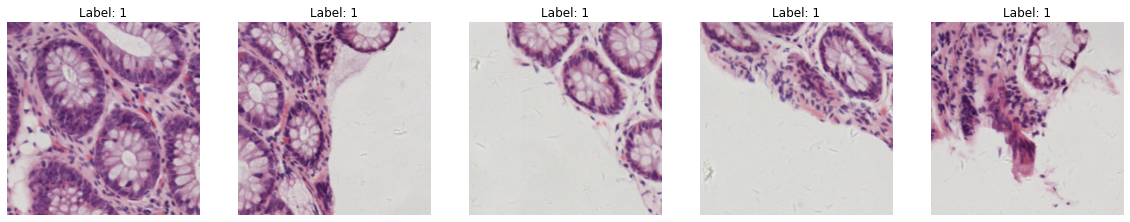

In [64]:
# Show first 5 images and labels from the train dataset
show_images(cy_train_dataset, num_images=5)

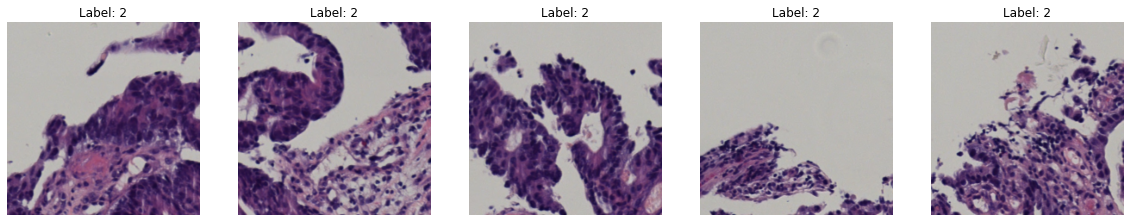

In [35]:
# Show first 5 images and labels from the train dataset
show_images(cy_test_dataset, num_images=5)

In [36]:
# convert ssa and hp to 1 and 0 repsectively
# Define a dictionary to map 'HP' to 0 and 'SSA' to 1
label_mapping = {'HP': 0, 'SSA': 1}

# Replace the majority vote labels with their corresponding numerical values
mhist_csv['Majority Vote Label'] = mhist_csv['Majority Vote Label'].replace(label_mapping)

# Display the updated DataFrame
mhist_csv.head()


Image Name  Majority Vote Label  \
0  MHIST_aag.png                    0   
1  MHIST_aah.png                    0   
2  MHIST_aar.png                    0   
3  MHIST_aay.png                    0   
4  MHIST_abs.png                    0   

   Number of Annotators who Selected SSA (Out of 7) Partition  Unnamed: 4  \
0                                                 2      test         NaN   
1                                                 2      test         NaN   
2                                                 0      test         NaN   
3                                                 1      test         NaN   
4                                                 2      test         NaN   

   Unnamed: 5 Unnamed: 6  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN

In [37]:
mhist_csv['Majority Vote Label'].value_counts()

Majority Vote Label
0    617
1    360
Name: count, dtype: int64

In [38]:
mhist_csv

Image Name  Majority Vote Label  \
0    MHIST_aag.png                    0   
1    MHIST_aah.png                    0   
2    MHIST_aar.png                    0   
3    MHIST_aay.png                    0   
4    MHIST_abs.png                    0   
..             ...                  ...   
972  MHIST_bvz.png                    1   
973  MHIST_bzm.png                    1   
974  MHIST_bzh.png                    1   
975  MHIST_byq.png                    1   
976  MHIST_bya.png                    1   

     Number of Annotators who Selected SSA (Out of 7) Partition  Unnamed: 4  \
0                                                   2      test         NaN   
1                                                   2      test         NaN   
2                                                   0      test         NaN   
3                                                   1      test         NaN   
4                                                   2      test         NaN   
..                                                ...       ...         ...   
972                                                 5      test         NaN   
973                                                 4      test         NaN   
974                                                 4      test         NaN   
975                                                 4      test         NaN   
976                                                 5      test         NaN   

     Unnamed: 5 Unnamed: 6  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
..          ...        ...  
972         NaN        NaN  
973         NaN        NaN  
974         NaN        NaN  
975         NaN        NaN  
976         NaN        NaN  

[977 rows x 7 columns]

In [39]:
#drop unncessary columns and rename to match chaoyang nameing schema

mhist_csv = mhist_csv.drop(columns=["Number of Annotators who Selected SSA (Out of 7)", 'Partition', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
mhist_csv_df = mhist_csv.rename(columns={'Image Name': 'name', 'Majority Vote Label': 'label'})
mhist_csv_df.head()

name  label
0  MHIST_aag.png      0
1  MHIST_aah.png      0
2  MHIST_aar.png      0
3  MHIST_aay.png      0
4  MHIST_abs.png      0

### 2. Resize the mhist dataset to match chaoyang's

In [40]:
# Convert DataFrame to list of dictionaries
json_labels = mhist_csv_df.to_dict('records')

In [41]:
mhist_dataset = CustomImageDataset(
    root_dir='/Users/yukiekuang/Downloads/images',
    json_labels=json_labels,  # Corrected argument name
)

In [42]:
print(f"mhist dataset length: {len(mhist_dataset)}")

mhist dataset length: 977


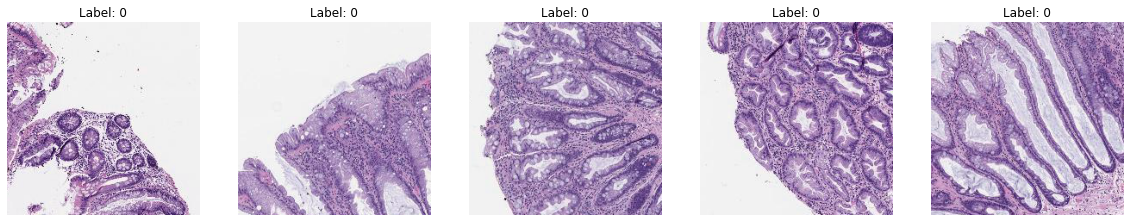

In [43]:
# Show first 5 images and labels from the MHIST dataset
show_images(mhist_dataset, num_images=5)

### 3. Split the mhist dataset into test and split

In [44]:
#mhist has to be split into train and test using pytorch
from torch.utils.data import random_split


In [45]:
# Calculate the sizes of each subset
total_size = len(mhist_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

In [46]:
mhist_train, mhist_test = random_split(mhist_dataset, [train_size, test_size])

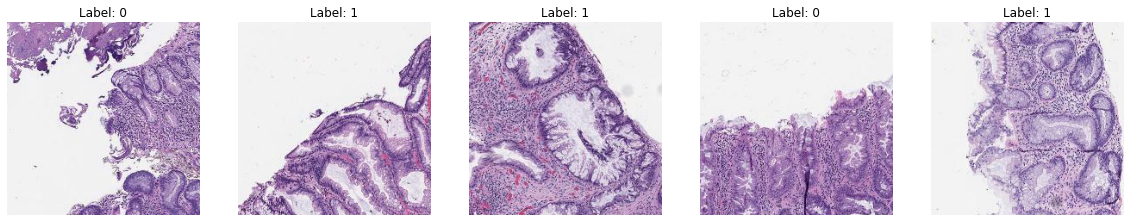

In [47]:
show_images(mhist_train, num_images=5)

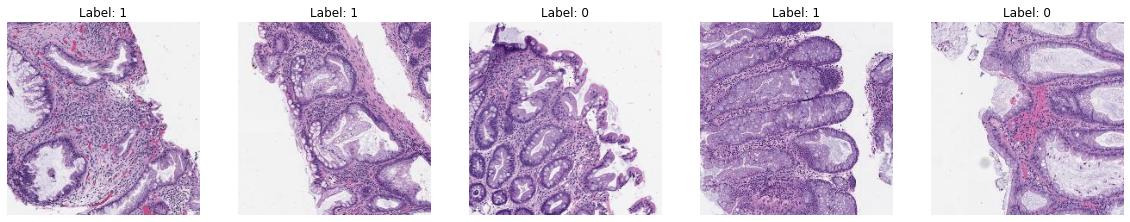

In [48]:
show_images(mhist_test, num_images=5)

In [49]:
print(f"mhist train dataset length: {len(mhist_train)}")

mhist train dataset length: 781


In [50]:
print(f"mhist test dataset length: {len(mhist_test)}")

mhist test dataset length: 196


### 4. Merge mhist test/split to pre-split test and train chaoyang dataset repsectively

In [51]:
# Combined Dataset with ConcatDataset 
from torch.utils.data import ConcatDataset

In [52]:
train = ConcatDataset([mhist_train,cy_train_dataset])

In [53]:
test = ConcatDataset([mhist_test, cy_test_dataset])

In [54]:
print(f"Train dataset length: {len(train)}")

Train dataset length: 4802


In [55]:
print(f"Train dataset length: {len(test)}")

Train dataset length: 2335


In [56]:
# check the distributions using a counter for label distributions

from collections import Counter


def get_class_distribution(dataset):
    count_dict = Counter()
    for _, label in dataset:
        count_dict[label] += 1
    return count_dict

train_class_distribution = get_class_distribution(train)
test_class_distribution = get_class_distribution(test)

# Calculate the totals for each class
train_total = sum(train_class_distribution.values())
test_total = sum(test_class_distribution.values())

print("Train class distribution:", train_class_distribution)
print("Train total:", train_total)

print("Test class distribution:", test_class_distribution)
print("Test total:", test_total)

Train class distribution: Counter({0: 1611, 2: 1404, 1: 1123, 3: 664})
Train total: 4802
Test class distribution: Counter({2: 840, 0: 822, 1: 400, 3: 273})
Test total: 2335


<u><b>Class Distributions</b></u>
| Labels | Test: | Train: | Total: |
|--------|-------|--------|-------|
| 0      | 826   | 1611   | 2437  |
| 1      | 400   | 1123   | 1523  |
| 2      | 840   | 1404   | 2244  |
| 3      | 273   | 664    | 937   |
| **Total:** | 2335 | 4802| 7137 |



In [57]:
# double check the sizing of the dataset before me move on to the next steps

def check_image_sizes(dataset):
    sizes = Counter()
    for _, img_tuple in enumerate(dataset):
        # Unpack the tuple
        img, label = img_tuple
        # Get the size of the image
        sizes[img.size] += 1  # img.size is a tuple (width, height)
    return sizes

# Assuming train and test are PyTorch Dataset objects wrapped by ConcatDataset
train_sizes = check_image_sizes(train)
test_sizes = check_image_sizes(test)

print("Train image sizes:", train_sizes)
print("Test image sizes:", test_sizes)

Train image sizes: Counter({(224, 224): 4802})
Test image sizes: Counter({(224, 224): 2335})


In [58]:
# get the percentage split
# Get the lengths of the train and test datasets
len_train = len(train)
len_test = len(test)

# Calculate the total number of samples
total = len_train + len_test

# Calculate the percentage of the total for train and test
pct_train = (len_train / total) * 100
pct_test = (len_test / total) * 100

# Print out the percentages
print(f"Train percentage: {pct_train:.2f}%")
print(f"Test percentage: {pct_test:.2f}%")

# Optionally, check against your desired ratio
desired_train_pct = 80  # For example, if you want an 80/20 split
desired_test_pct = 100 - desired_train_pct

Train percentage: 67.28%
Test percentage: 32.72%


This dataset is now around a 70/30 split. 

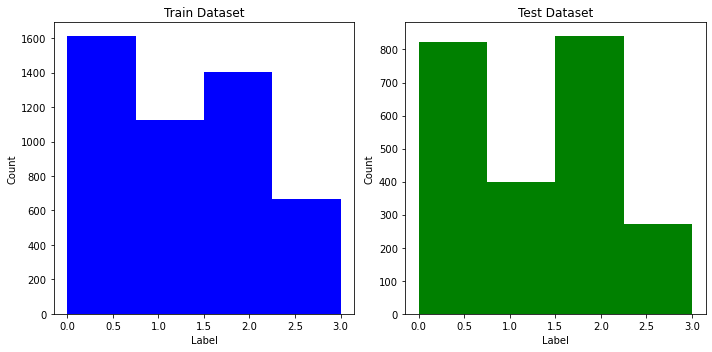

In [59]:
#visualize test vs train
# Get labels from the combined train dataset
train_labels = [label for _, label in train]

# Get labels from the combined test dataset
test_labels = [label for _, label in test]

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for train dataset
axs[0].hist(train_labels, bins=len(set(train_labels)), color='blue', alpha=1)
axs[0].set_title('Train Dataset')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# Plot histogram for test dataset
axs[1].hist(test_labels, bins=len(set(test_labels)), color='green', alpha=1)
axs[1].set_title('Test Dataset')
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

## 5. Run the combined test and trained datasets through: 

- noise detetion
- data augmentation 
- edge detection
- pixel value scaling

Start with noise reduction: 

In [66]:
def noise_reduction(img):
    # Apply a median filter
    return img.filter(ImageFilter.MedianFilter(size=3))

In [67]:
def noise_reduction_cv2(img):
    # Convert PIL Image to NumPy array
    img_np = np.array(img)
    # Apply a median blur
    img_np = cv2.medianBlur(img_np, 5)
    # Convert back to PIL Image
    return Image.fromarray(img_np)

In [69]:
augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # Add more transformations as needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [68]:
def edge_detection_cv2(img):
    img_np = np.array(img)
    # Convert to grayscale
    gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detector
    edges = cv2.Canny(gray, 100, 200)
    # Convert back to PIL Image (note: the result will be grayscale)
    return Image.fromarray(edges)

In [61]:
transformations = transforms.Compose([
    # Noise reduction and edge detection custom transforms here (operating on PIL Images)
    transforms.Lambda(lambda img: noise_reduction(img)),
    transforms.Lambda(lambda img: edge_detection_cv2(img)),
    # Standard PyTorch augmentations
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    # Convert to tensor and normalize
    transforms.ToTensor()
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])

- pixel value scaling

------------

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layer block 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Convolutional layer block 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32 * 56 * 56, out_features=120)  # The size here depends on the output size of the conv layers
        self.fc2 = nn.Linear(in_features=120, out_features=num_classes)

    def forward(self, x):
        # Apply conv block 1 followed by pooling
        x = self.pool(F.relu(self.conv1(x)))
        
        # Apply conv block 2 followed by pooling
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten the output from the conv layers to enter the fully connected layer
        x = x.view(-1, 32 * 56 * 56)
        
        # Apply the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [ ]:
# Example: Instantiate the model for a dataset with 10 classes
model = SimpleCNN(num_classes=10)

# Example: Forward pass with random input
# This assumes you're working with images of size 224x224
random_input = torch.randn((1, 3, 224, 224))
output = model(random_input)
print(output)

-------------

### <b>Next Steps:</b>

1. dataloader - combined_loader = DataLoader(combined_dataset, batch_size=32, shuffle=True)


#### Run CNN
 - pca if the data needs to be reduced further 

#### Reiterate,Reiterate,Reiterate
- Apply transforms to your dataset > Run CNN > Evaluate performance > Record results
- 


